#  Student Feedback Analysis Dashboard  

This notebook analyzes student survey responses using numeric rating data.  
It includes:  
- Average ratings per question  
- Correlation between feedback dimensions  
- Distribution of overall ratings  
- Insights and recommendations for improvement  

---

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
file_path = "Student survey feedback resposes.xlsx"   # 🔄 Change to your actual file name
sheet_name = "student_feedback(1)"    # given sheet name
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Preview first few rows
df.head()

,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,0,340,5,2,7,6,9,2,1,8
1,1,253,6,5,8,6,2,1,2,9
2,2,680,7,7,6,5,4,2,3,1
3,3,806,9,6,7,1,5,9,4,6
4,4,632,8,10,8,4,6,6,9,9


In [24]:
non_q = ['Unnamed: 0','Student ID']
questions = [c for c in df.columns if c not in non_q]
print("Survey questions:", questions)

Survey questions: ['Well versed with the subject', 'Explains concepts in an understandable way', 'Use of presentations', 'Degree of difficulty of assignments', 'Solves doubts willingly', 'Structuring of the course', 'Provides support for students going above and beyond', 'Course recommendation based on relevance', 'mean_rating']


In [17]:
rating_columns = [
    'Well versed with the subject',
    'Explains concepts in an understandable way',
    'Use of presentations',
    'Degree of difficulty of assignments',
    'Solves doubts willingly',
    'Structuring of the course',
    'Provides support for students going above and beyond',
    'Course recommendation based on relevance'
]

if 'mean_rating' not in df.columns:
    df['mean_rating'] = df[rating_columns].mean(axis=1)

df[['Student ID','mean_rating']].head()

,Student ID,mean_rating
0,340,5.000
1,253,4.875
2,680,4.375
3,806,5.875
4,632,7.500


Dashboard Visualizations
We will now create visual insights from the numeric ratings:
1. *Average rating per question*  
2. *Correlation heatmap*  
3. *Distribution of overall mean rating*

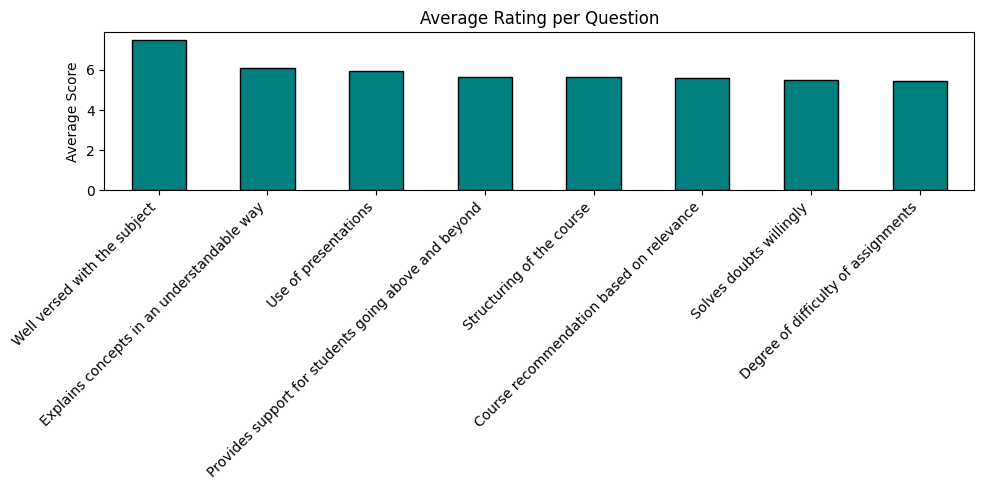

In [19]:
avg_per_question = df[rating_columns].mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
avg_per_question.plot(kind='bar', color='teal', edgecolor='black')
plt.title("Average Rating per Question")
plt.ylabel("Average Score")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

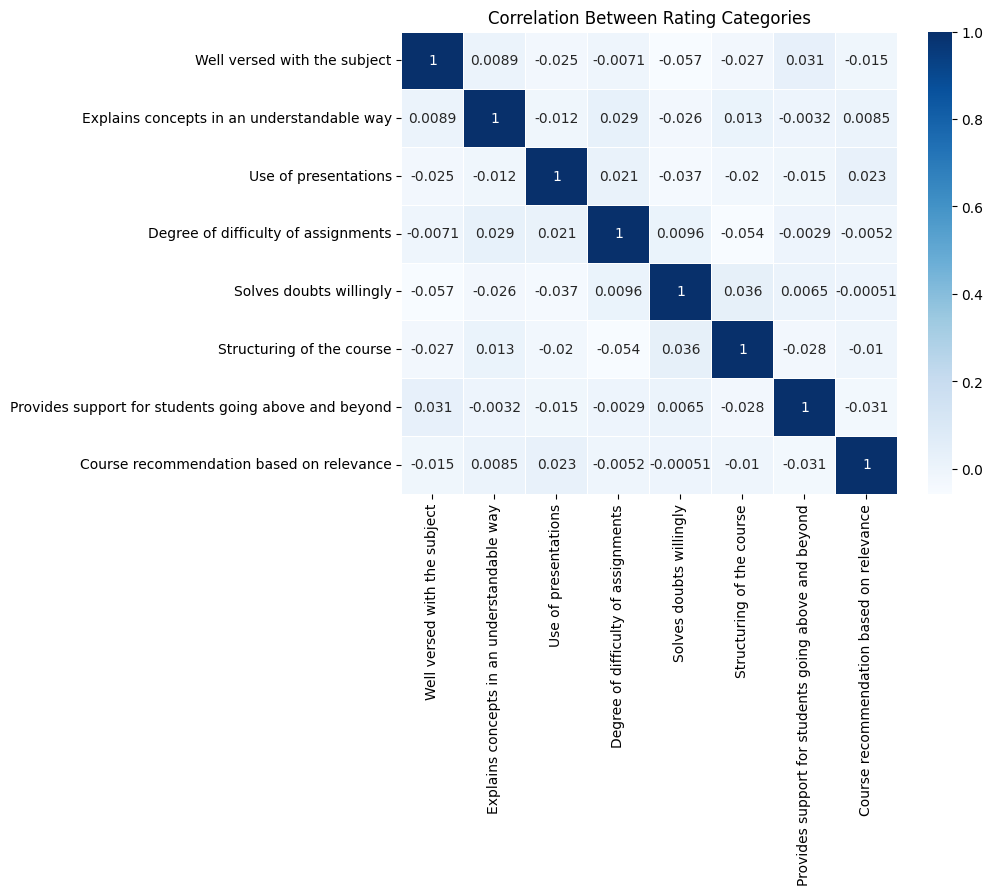

In [20]:
plt.figure(figsize=(8,6))
sns.heatmap(df[rating_columns].corr(), annot=True, cmap="Blues", linewidths=0.5)
plt.title("Correlation Between Rating Categories")
plt.show()

In [25]:
def cronbach_alpha(items):
    items = items.dropna()
    item_vars = items.var(axis=0, ddof=1)
    total_var = items.sum(axis=1).var(ddof=1)
    n = items.shape[1]
    return (n/(n-1))*(1 - item_vars.sum()/total_var)

alpha = cronbach_alpha(df[questions])
print("Cronbach's alpha:", round(alpha,3))

Cronbach's alpha: 0.186


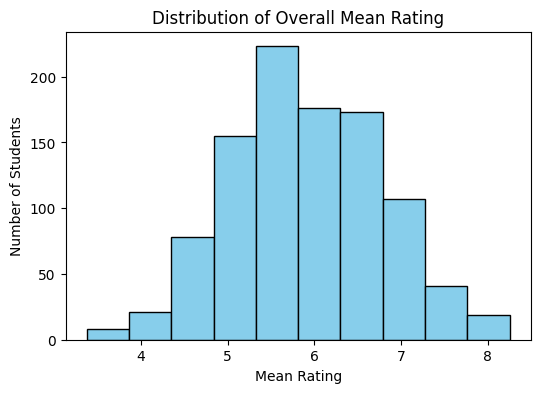

In [21]:
plt.figure(figsize=(6,4))
df['mean_rating'].plot(kind='hist', bins=10, color='skyblue', edgecolor='black')
plt.title("Distribution of Overall Mean Rating")
plt.xlabel("Mean Rating")
plt.ylabel("Number of Students")
plt.show()

Insights & Recommendations
Below we summarize the strengths, weaknesses, and recommendations derived from the feedback data.

In [26]:
print("🔹 Insights from Student Feedback:\n")

print("1. Strengths (High-rated areas):")
high_scores = avg_per_question[avg_per_question >= avg_per_question.mean()]
for q, score in high_scores.items():
    print(f"   - {q}: {round(score,2)}")

print("\n2. Areas for Improvement (Lower-rated areas):")
low_scores = avg_per_question[avg_per_question < avg_per_question.mean()]
for q, score in low_scores.items():
    print(f"   - {q}: {round(score,2)}")

print("\n3. Overall Satisfaction:")
print(f"   - Average mean rating across all students: {round(df['mean_rating'].mean(),2)} / 10")

print("\n Recommendations:")
print("- Maintain strong subject expertise and relevance of course content.")
print("- Revisit assignment structure and difficulty to ensure clarity.")
print("- Improve course structuring for better learning flow.")
print("- Continue supporting students beyond standard expectations.")

🔹 Insights from Student Feedback:

1. Strengths (High-rated areas):
   - Well versed with the subject: 7.5
   - Explains concepts in an understandable way: 6.08
   - Use of presentations: 5.94

2. Areas for Improvement (Lower-rated areas):
   - Provides support for students going above and beyond: 5.66
   - Structuring of the course: 5.64
   - Course recommendation based on relevance: 5.6
   - Solves doubts willingly: 5.47
   - Degree of difficulty of assignments: 5.43

3. Overall Satisfaction:
   - Average mean rating across all students: 5.92 / 10

 Recommendations:
- Maintain strong subject expertise and relevance of course content.
- Revisit assignment structure and difficulty to ensure clarity.
- Improve course structuring for better learning flow.
- Continue supporting students beyond standard expectations.
